In [467]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam

In [468]:
df=pd.read_csv('Infosys_new_data.csv',infer_datetime_format=True,index_col='Date')

In [469]:
df.head(2)

Open      High       Low     Close  Adj Close   Volume
Date                                                                  
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000

# Scaling the data

In [470]:
df_new=df.iloc[:,3]
df_new=np.array(df_new)


In [471]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df_new.reshape(-1,1))

In [472]:
scaled_data.shape

(5285, 1)

# Get Independent and dependent features

In [473]:
x=scaled_data
window=30
days = 7
ln = (len(x)-window)%(days)
x = x[0:len(x)-ln]

def independet_prep(window,x):
    independent_features = []
    for i in range(window, len(x), days):
        independent_features.append(x[i-window:i])

    independent_features = np.array(independent_features)
    return independent_features


def dependent_prep(window,x):
    dependent_features = []
    for i in range(window, len(x), days):
        dependent_features.append(x[i:i+days])
        
    dependent_features = np.array(dependent_features)
    #here dependent_features[1: ] to all because the response at first index i don't want 
    return dependent_features

x1=independet_prep(window,x)
y2=dependent_prep(window,x)
#cls = x[window:,3]
y1=y2.reshape(y2.shape[0],y2.shape[1])

In [474]:
x1.shape

(750, 30, 1)

In [475]:
y1.shape
#y1.reshape(x1.shape[0],y1.shape[1])

(750, 7)

# splitting the data in training and test sets

In [476]:

training_size=round(len(x1)*0.7)
val_size=round(len(x1)*0.5)
x_train,y_train=x1[:training_size],y1[:training_size]
x_val,y_val=x1[val_size:training_size],y1[val_size:training_size]
x_test,y_test=x1[training_size:],y1[training_size:]
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(525, 30, 1)
(525, 7)
(150, 30, 1)
(150, 7)
(225, 30, 1)
(225, 7)


# Building model for randomized search CV


In [477]:
'''def model_keras(learning_rate=0.001,optimizers=Adam,activation='tanh'):
    model=Sequential()
    model.add(LSTM(units=64,input_shape=(x_train.shape[1],x_train.shape[2])))
    #model.add(Dense(units=40,activation=activation))
    model.add(Dense(units=20,activation=activation))
    model.add(Dense(units=days,activation='linear'))
    model.compile(loss='mae',optimizer=optimizers,metrics=['mean_absolute_error'])
    return model

from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

keras_model = KerasClassifier(build_fn=model_keras)
param_grid={'epochs':[50,80,100,200],
            'learning_rate':[0.01,0.001,0.0001,0.1],
             'optimizers':['Adam','RMSProp','SGD'],
             'activation':['sigmoid','tanh','relu']}

random_search=RandomizedSearchCV(keras_model,param_grid,random_state=0)

search=random_search.fit(x_train,y_train,validation_split=0.3)
best_prameter=search.best_params_
print("best_parameter",best_prameter)
best_sc=search.best_score_
print("best_score",best_sc)
score=search.score
print("score",score)'''

'def model_keras(learning_rate=0.001,optimizers=Adam,activation=\'tanh\'):\n    model=Sequential()\n    model.add(LSTM(units=64,input_shape=(x_train.shape[1],x_train.shape[2])))\n    #model.add(Dense(units=40,activation=activation))\n    model.add(Dense(units=20,activation=activation))\n    model.add(Dense(units=days,activation=\'linear\'))\n    model.compile(loss=\'mae\',optimizer=optimizers,metrics=[\'mean_absolute_error\'])\n    return model\n\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom keras.wrappers.scikit_learn import KerasClassifier\n\nkeras_model = KerasClassifier(build_fn=model_keras)\nparam_grid={\'epochs\':[50,80,100,200],\n            \'learning_rate\':[0.01,0.001,0.0001,0.1],\n             \'optimizers\':[\'Adam\',\'RMSProp\',\'SGD\'],\n             \'activation\':[\'sigmoid\',\'tanh\',\'relu\']}\n\nrandom_search=RandomizedSearchCV(keras_model,param_grid,random_state=0)\n\nsearch=random_search.fit(x_train,y_train,validation_split=0.3)\nbest_prameter=searc

# K-fold Cross validation for validation

In [478]:
'''from sklearn.model_selection import KFold
import numpy as np

k = 5
metrics = []

kf = KFold(n_splits=k, shuffle=True)

for train_index, val_index in kf.split(x_train):
    X_train, X_val = x_train[train_index], x_train[val_index]
    print(X_train.shape,X_val.shape)
    print(y_train.shape)
    Y_train, Y_val = y_train[train_index], y_train[val_index]
    print(y_train.shape,y_val.shape)

    model1.fit(X_train, Y_train, validation_data=(X_val, Y_val))

    scores = model1.evaluate(X_val, y_val)
    metrics.append(scores)
    #print(scores)

average_metric = np.mean(metrics)

print("Average metric:", average_metric)
'''

'from sklearn.model_selection import KFold\nimport numpy as np\n\nk = 5\nmetrics = []\n\nkf = KFold(n_splits=k, shuffle=True)\n\nfor train_index, val_index in kf.split(x_train):\n    X_train, X_val = x_train[train_index], x_train[val_index]\n    print(X_train.shape,X_val.shape)\n    print(y_train.shape)\n    Y_train, Y_val = y_train[train_index], y_train[val_index]\n    print(y_train.shape,y_val.shape)\n\n    model1.fit(X_train, Y_train, validation_data=(X_val, Y_val))\n\n    scores = model1.evaluate(X_val, y_val)\n    metrics.append(scores)\n    #print(scores)\n\naverage_metric = np.mean(metrics)\n\nprint("Average metric:", average_metric)\n'

In [479]:
x_val.shape,y_val.shape

((150, 30, 1), (150, 7))

# Model with LSTM,BI-LSTM and Batch_Normalization

In [480]:
from keras.layers import Bidirectional
tf.keras.layers.BatchNormalization


keras.layers.normalization.batch_normalization.BatchNormalization

In [481]:
model1=Sequential()
model1.add(Bidirectional(LSTM(units=64)))
model1.add(tf.keras.layers.BatchNormalization())

'''model1.add(Dropout(0.2))
model1.add(LSTM(units=70,return_sequences=True))
model1.add(Dropout(0.3))
model1.add(LSTM(units=50,return_sequences=True))
model1.add(Dropout(0.5))
model1.add(LSTM(units=25,return_sequences=False))
model1.add(Dropout(0.5))
'''

#model1.add(Dense(units=10,activation='tanh',input_shape=(x_train.shape[1],x_train.shape[2])))
model1.add(Dense(units=days))

model1.compile(loss='mae',optimizer='Adam',metrics=['mean_absolute_error'])
model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=100)

'''
from tensorflow.keras.layers import RepeatVector
model1 = Sequential()

model1.add(LSTM(units=x_train.shape[0],input_shape=(x_train.shape[1],x_train.shape[2]),activation='tanh'))

model1.add(RepeatVector(x_train.shape[1]))
model1.add(LSTM(units=50,activation='tanh'))
model1.add(Dense(units=25,activation='tanh',input_shape=(x_train.shape[1],x_train.shape[2])))
model1.add(Dense(units=days))
'''



Epoch 1/100
17/17 [==============================] - 20s 202ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - val_loss: 0.1486 - val_mean_absolute_error: 0.1486
Epoch 2/100
17/17 [==============================] - 1s 37ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - val_loss: 0.0599 - val_mean_absolute_error: 0.0599
Epoch 3/100
17/17 [==============================] - 1s 32ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - val_loss: 0.0651 - val_mean_absolute_error: 0.0651
Epoch 4/100
17/17 [==============================] - 1s 31ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - val_loss: 0.0677 - val_mean_absolute_error: 0.0677
Epoch 5/100
17/17 [==============================] - 1s 30ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - val_loss: 0.0661 - val_mean_absolute_error: 0.0661
Epoch 6/100
17/17 [==============================] - 1s 35ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - val_loss: 0.0589 - val_mean_absolute_error: 0.0589
Epoch 7/100
17

"\nfrom tensorflow.keras.layers import RepeatVector\nmodel1 = Sequential()\n\nmodel1.add(LSTM(units=x_train.shape[0],input_shape=(x_train.shape[1],x_train.shape[2]),activation='tanh'))\n\nmodel1.add(RepeatVector(x_train.shape[1]))\nmodel1.add(LSTM(units=50,activation='tanh'))\nmodel1.add(Dense(units=25,activation='tanh',input_shape=(x_train.shape[1],x_train.shape[2])))\nmodel1.add(Dense(units=days))\n"

In [482]:
predict=model1.predict(x_test)
print("shape of predict",predict.shape)
print("shape of y_test",y_test.shape)

8/8 [==============================] - 2s 12ms/step
shape of predict (225, 7)
shape of y_test (225, 7)


In [484]:

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,predict)
print("Test_error",mae)

Test_error 0.02561960433570196


In [485]:
train_predict=model1.predict(x_train)
print("shape of train_predict",train_predict.shape)
print("shape of y_train",y_train.shape)

17/17 [==============================] - 0s 12ms/step
shape of train_predict (525, 7)
shape of y_train (525, 7)


In [486]:

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_train,train_predict)
print("Train_error",mae)

Train_error 0.0237940709178156


In [487]:
predict.shape,y_test.shape

((225, 7), (225, 7))

# Checking each day actual vs output for 5 days

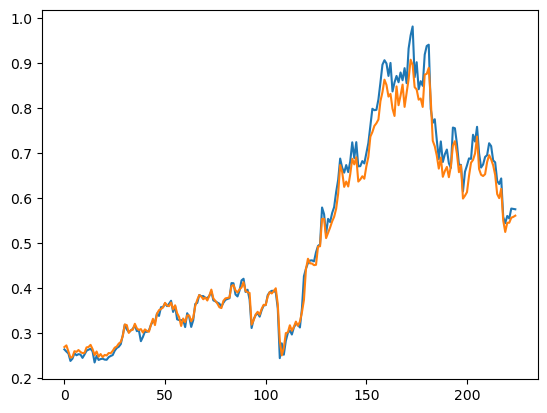

In [490]:
plt.plot(y_test[:,0])
plt.plot(predict[:,0])

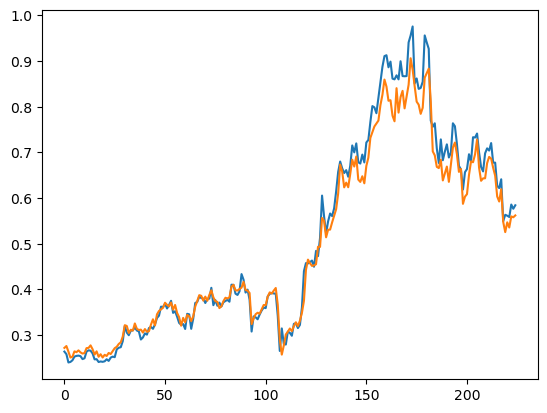

In [483]:
plt.plot(y_test[:,1])
plt.plot(predict[:,1])

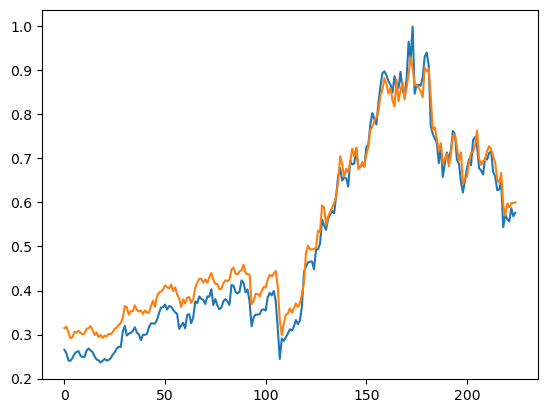

In [488]:
plt.plot(y_test[:,2])
plt.plot(predict[:,2])

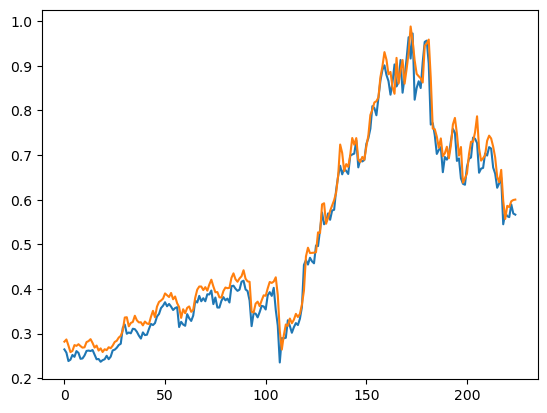

In [489]:
plt.plot(y_test[:,3])
plt.plot(predict[:,3])

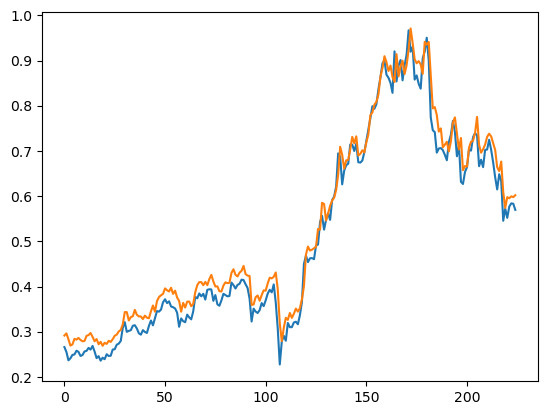

In [491]:
plt.plot(y_test[:,4])
plt.plot(predict[:,4])

# Checking how the model performs on 7 days splitting by flattening the data

# Taking closure look at the graph

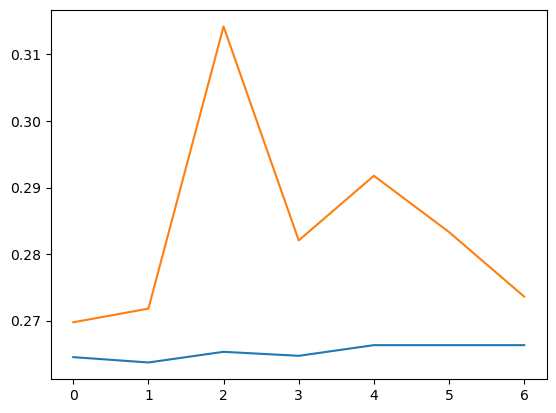

In [493]:
plt.plot(y_test[:1].flatten())
plt.plot(predict[:1].flatten())

# All 7 days actual vs predicted

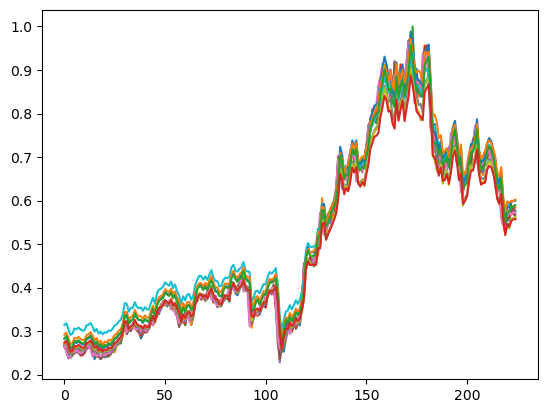

In [494]:
plt.plot(y_test)
plt.plot(predict)

# All 7 days actual vs predicted but the data is flattened

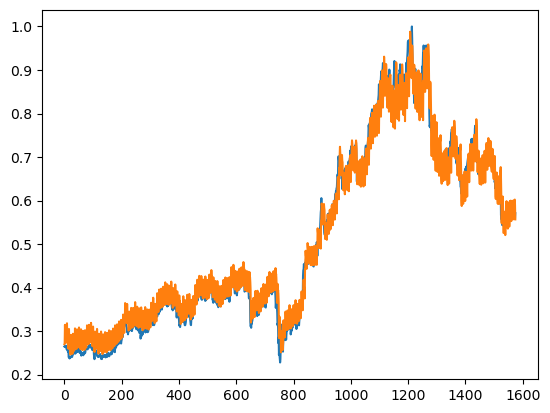

In [495]:
plt.plot(y_test.flatten())
plt.plot(predict.flatten())

# y_test alone flattened

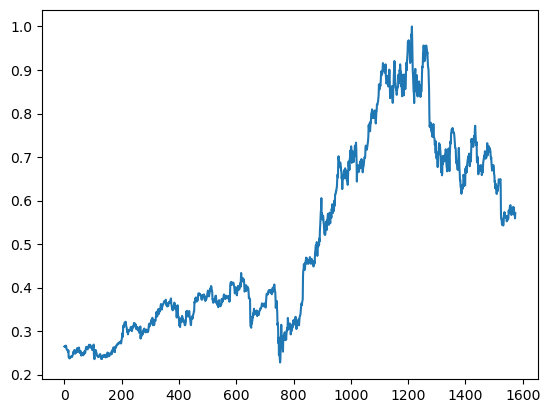

In [497]:
plt.plot(y_test.flatten())


# Actual alone flattened


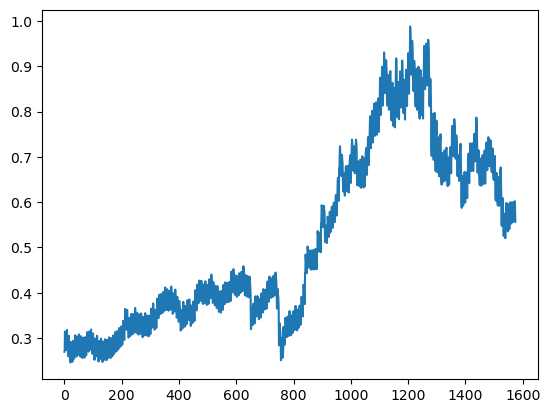

In [498]:
plt.plot(predict.flatten())

# Data broken down in 7 days 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


shape of reshaped_data 225
shape of reshaped_data 225


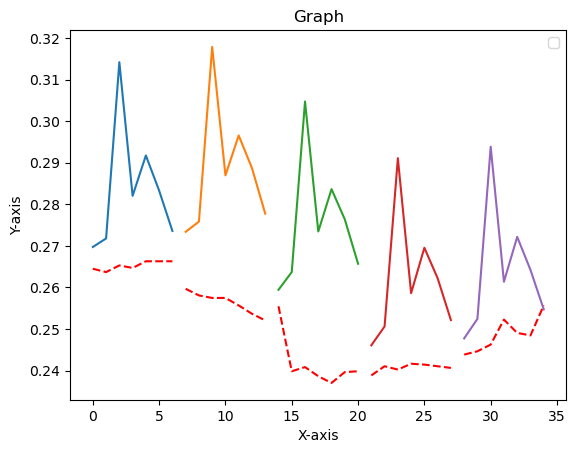

In [500]:
predict_flatten=predict.flatten()
data = predict_flatten 
#print("length of data list",len(data))

# Flatten and convert actual values to a list
actual_flatten = y_test.flatten()
actual_data = actual_flatten
#print("length of actual data after flatten and list",len(actual_data))

# Reshape the data to have 7 columnsa

reshaped_data = [data[i:i+7] for i in range(0, len(data), 7)]
print("shape of reshaped_data",len(reshaped_data))

# Create the plot
fig, ax = plt.subplots()
for i, row in enumerate(reshaped_data[:5]): 
    x= range(i*7, (i+1)*7)
    ax.plot(x, row)

reshaped_data2 = [actual_data[i:i+7] for i in range(0, len(actual_data), 7)]
print("shape of reshaped_data",len(reshaped_data2))

for j, col in enumerate(reshaped_data2[:5]): 
    y = range(j*7, (j+1)*7)
    ax.plot(y, col,linestyle='--', color='red')

# Plot each row of data (actual values)
#plt.plot(y_test[: :5])
# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
#plt.ylim(0,1)
ax.set_title('Graph')
ax.legend()
plt.show()

# Some test whether how much the actual and predicted values fluctuates 

In [501]:
predict[224]

array([0.5616243 , 0.5620028 , 0.60038114, 0.60025597, 0.6022476 ,
       0.589712  , 0.5566288 ], dtype=float32)

In [502]:
y_test[224]

array([0.57581905, 0.58423852, 0.5766209 , 0.56659773, 0.56980514,
       0.55898011, 0.57100792])

In [503]:
test_pred=predict.flatten()
test_pred[(223*7):(224*7)]

array([0.55889857, 0.5578831 , 0.59832263, 0.5993079 , 0.59813017,
       0.5858229 , 0.55689424], dtype=float32)

In [504]:
test_actual=y_test.flatten()
test_actual[(223*7):(224*7)]

array([0.5766209 , 0.5766209 , 0.56860236, 0.56900329, 0.58343667,
       0.58504037, 0.57341349])

# Same as the previous but on all data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


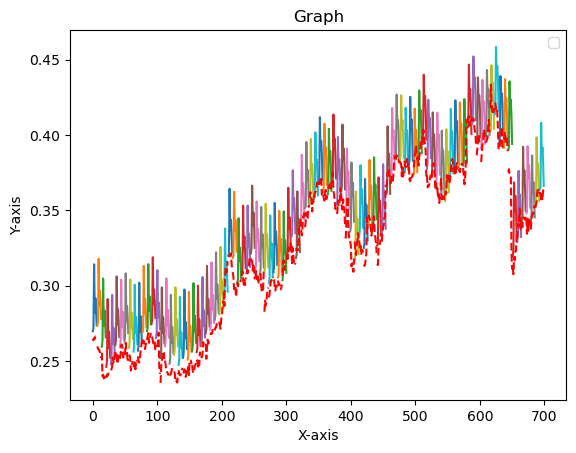

In [507]:

#print("predict shape",predict.shape)
predict_flatten=predict.flatten()
data =predict_flatten
#print("length of data list",len(data))
actual_flatten = y_test.flatten()
actual_data =actual_flatten

reshaped_data = [data[i:i+days] for i in range(0, len(data), days)]
fig, ax = plt.subplots()
for i, row in enumerate(reshaped_data[:100]): 
    x = range(i*days, (i+1)*days)
    ax.plot(x, row)  


    
reshaped_data2 = [actual_data[i:i+days] for i in range(0, len(actual_data), days)]
# Plot each row of data (actual values)
for j, col in enumerate(reshaped_data2[:100]):
    y = range(j*days, (j+1)*days)
    ax.plot(y, col, linestyle='--', color='red')
    
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
#plt.ylim(0,1)


ax.set_title('Graph')
ax.legend()
plt.show()

# Again taking look at the data fluctualtion 

In [508]:
reshaped_data[0]

array([0.2697402 , 0.27179128, 0.31420496, 0.28204733, 0.29176185,
       0.28330347, 0.2735992 ], dtype=float32)

In [509]:
row

array([0.36362258, 0.36575758, 0.40812564, 0.3858657 , 0.39184374,
       0.3832947 , 0.36620796], dtype=float32)

In [510]:
predict[0]

array([0.2697402 , 0.27179128, 0.31420496, 0.28204733, 0.29176185,
       0.28330347, 0.2735992 ], dtype=float32)

In [511]:
predict_flatten[:7]

array([0.2697402 , 0.27179128, 0.31420496, 0.28204733, 0.29176185,
       0.28330347, 0.2735992 ], dtype=float32)

In [512]:
actual_data[:7]

array([0.26449913, 0.26369727, 0.26530098, 0.26469959, 0.2663033 ,
       0.2663033 , 0.2663033 ])

In [513]:
col

array([0.36212489, 0.36012025, 0.35731376, 0.36092211, 0.35691283,
       0.36332767, 0.36212489])

In [514]:
reshaped_data2[:1]

[array([0.26449913, 0.26369727, 0.26530098, 0.26469959, 0.2663033 ,
        0.2663033 , 0.2663033 ])]

# An another way to concatenate data to see actual vs prediction fluctuation but it's not a good way

In [420]:
'''plt.figure(figsize=(20,10))
predict_0=predict[:,0]
predict_1=predict[:,1]
predict_2=predict[:,2]
predict_3=predict[:,3]
predict_4=predict[:,4]
predict_5=predict[:,5]
predict_6=predict[:,6]
c=np.concatenate((predict_0,predict_1,predict_2,predict_3,predict_4,predict_5,predict_6))
print(c.shape)
actual_0=y_test[:,0]
actual_1=y_test[:,1]
actual_2=y_test[:,2]
actual_3=y_test[:,3]
actual_4=y_test[:,4]
actual_5=y_test[:,5]
actual_6=y_test[:,6]
w=np.concatenate((actual_0,actual_1,actual_2,actual_3,actual_4,actual_5,actual_6))
print(w.shape)
# f=w[:100]


print(plt.plot(c,color='red'))
print(plt.plot(w,color='green'))

# '''

"plt.figure(figsize=(20,10))\npredict_0=predict[:,0]\npredict_1=predict[:,1]\npredict_2=predict[:,2]\npredict_3=predict[:,3]\npredict_4=predict[:,4]\npredict_5=predict[:,5]\npredict_6=predict[:,6]\nc=np.concatenate((predict_0,predict_1,predict_2,predict_3,predict_4,predict_5,predict_6))\nprint(c.shape)\nactual_0=y_test[:,0]\nactual_1=y_test[:,1]\nactual_2=y_test[:,2]\nactual_3=y_test[:,3]\nactual_4=y_test[:,4]\nactual_5=y_test[:,5]\nactual_6=y_test[:,6]\nw=np.concatenate((actual_0,actual_1,actual_2,actual_3,actual_4,actual_5,actual_6))\nprint(w.shape)\n# f=w[:100]\n\n\nprint(plt.plot(c,color='red'))\nprint(plt.plot(w,color='green'))\n\n# "

# RNN with TimeSeriesGenerator

In [421]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# How many record to take into account
length = 2

batch_size = 1

# 1 beacause it's univariate
n_features = 1

generator = TimeseriesGenerator(train, train, stride=3, length=length, batch_size=batch_size)

model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss="mse")
model.fit(generator,epochs=10)

Epoch 1/10
3/3 [==============================] - 2s 4ms/step - loss: 34.3079
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 26.6473
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 20.0795
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 14.2818
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: 9.6488
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 4.9794
Epoch 7/10
3/3 [==============================] - 0s 8ms/step - loss: 3.6213
Epoch 8/10
3/3 [==============================] - 0s 8ms/step - loss: 1.7629
Epoch 9/10
3/3 [==============================] - 0s 4ms/step - loss: 0.7351
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4913


In [145]:
y_pred=model.predict(generator)

3/3 [==============================] - 0s 2ms/step
